# Part 1- Neural Network

In [66]:
### Import libraries
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

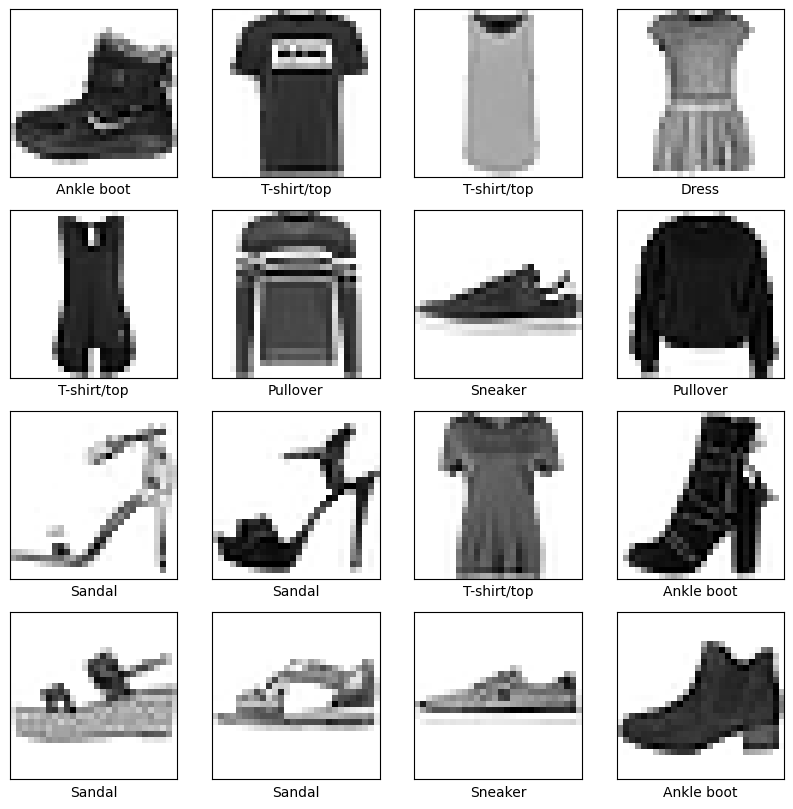

In [67]:
### Load the training and test data set from keras built-in dataset fasion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Plot 16 images as gray scale
plt.figure(figsize=(10,10))
### 1 to 16 images.
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    ### No grid lines
    plt.grid(False)
    ### Show images black and white.
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    ### Capture the label from y_train
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [68]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [69]:
### The images are 28 x 28 pixels.
### Each pixel represents the intensity of gray scale from 0 to 255
### Normalize inputs from 0-255 to 0-1 by dividing the array with 255.
### Each values comes within range 0 and 1.
### Examples: 0/255=0 , 1/255 ~ 0.038, 128/255 ~ 0.502, 255/255=1
X_train = X_train / 255
X_test = X_test / 255

In [70]:
### flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH=28
channels =1     ### Channels = 1 for Black and White, is 3 for RGB colour images.

In [71]:
### Create the model here
### Loss function to measure of error
### SparseCategoricalCrossentropy loss function is used for multi-class classification loss function.
### CategoricalCrossentropy if labels are one hot encoded [00101]
### logits=False when tensorflow output is probability.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

### Buildin the Neural Network Model
model = tf.keras.Sequential([
                             ### Flatten converts 2D image to 1D Vector
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             ### one Hidden layer with 128 neurons and Relu activation function
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             ### Output layer
                             ### Softmax for multi-class classification (10 Classes)
                             ### Other options Sigmoid for Binary classification and liner for liner regression
                             tf.keras.layers.Dense(10, activation= 'softmax')])
### Compile the Model
### Accuracy - Performance metric to check how often the model predictions are correct.
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
### Train the Model
### split 0.2 = 80% train, 20% Validation
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7339 - loss: 0.7840 - val_accuracy: 0.8413 - val_loss: 0.4596
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8520 - loss: 0.4265 - val_accuracy: 0.8502 - val_loss: 0.4180
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8606 - loss: 0.3940 - val_accuracy: 0.8669 - val_loss: 0.3891
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8708 - loss: 0.3637 - val_accuracy: 0.8761 - val_loss: 0.3540
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8855 - loss: 0.3271 - val_accuracy: 0.8756 - val_loss: 0.3521
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8841 - loss: 0.3203 - val_accuracy: 0.8763 - val_loss: 0.3433
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8895 - loss: 0.3073 - val_accuracy: 0.8740 - val_loss: 0.3604
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8917 - loss: 0.2926 - val_accuracy: 0.

**Model is performing well: 92% Accuracy and 89% validation accuracy**



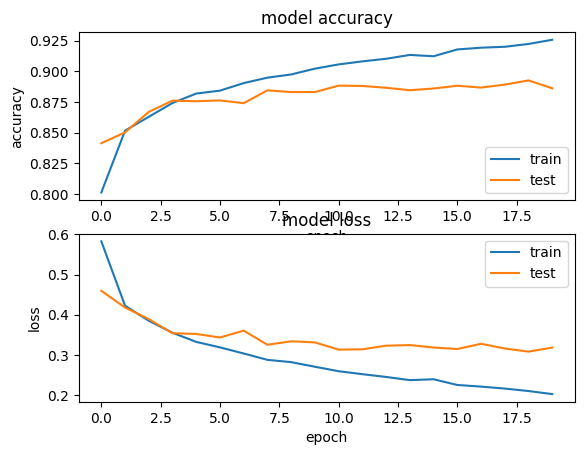

In [73]:
### Plot the Model Performances
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

**Observation - Model Accuracy**


1. The model training accuracy has steadily increased over the epochs.
2. The model validation accuracy also followed the trainig accuracy initailly, However the validation accuracy flattens after few ephocs. That means the performance on test dataset is not imprpving after epoch.
3. The best validation accuracy is 0.88.
4. The Model learnt well from epoch 5 to 8.
5. To push accuracy higher , we can try adding dropout layers.





**Observation - Model Loss**
1. The training loss(blue line) is dropping. Almost 0.20 at last epoch.
2. The Validation loss(orange line) also decresed initailly but latter it flatten. That is, the model is not performing well on unseen validation data after apoch 7.
3. The loss remains around 0.3 after epoch 8.

# Part 2- Image Processing

Load the Flower photo dataset from tensorflow repository

In [74]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
### Download dataset from the url using tf.keras.utils
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
### Converts string to path
data_dir = pathlib.Path(data_dir + "/flower_photos")

## a) How many images we can find in this dataset?*




In [75]:
### list(data_dir.glob('*/*.jpg'))
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(f"There are {image_count} images")

There are 3670 images


## b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


In [76]:
### List subdirectories
### p.is_dir() - check if the path is subdirectory.
### list - load into a list
### p.name reads the directory name
list(p.name for p in data_dir.glob('*') if p.is_dir())

['tulips', 'roses', 'dandelion', 'sunflowers', 'daisy']

In [77]:
### List five images
list(data_dir.glob('*/*'))[0:5]

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/7144016605_e159b6c06b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/14171673854_1208c19be3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/4579128789_1561575458_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/16862349256_0a1f91ab53.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/13509973805_bda5fa8982.jpg')]

In [78]:
### This line stores the list of data in subfolder
tulips = list(data_dir.glob('tulips/*'))
tulips[0:5]

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/7144016605_e159b6c06b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/14171673854_1208c19be3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/4579128789_1561575458_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/16862349256_0a1f91ab53.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips/13509973805_bda5fa8982.jpg')]

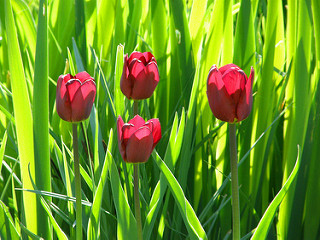

In [79]:
### Use Pillow to plot the image
PIL.Image.open(str(tulips[2]))

## c) Use Keras to resize all the images into same dimension 180x180

In [80]:
### Image dimension
batch_size = 32
img_height = 180
img_width = 180

In [81]:
### Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  ### 80% train and 20% validation
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [82]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  ### 80% train and 20% validation
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


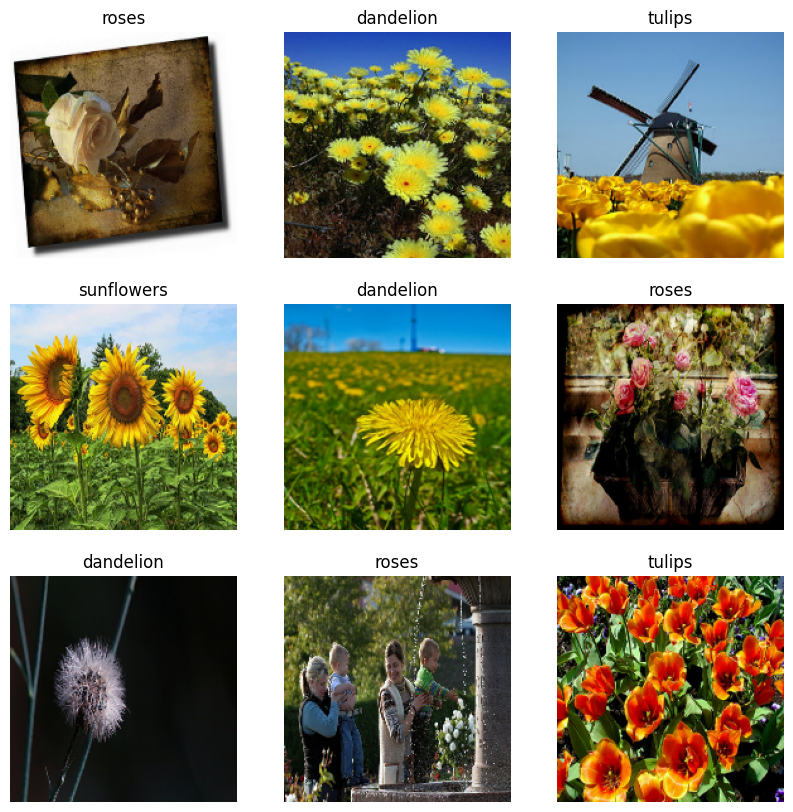

In [83]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    ### images[*] = image tensor
    ### numpy() = convert to numpy array
    ### unit8 = convert to unsigned 8-bit integer(0-255), standard format for displaying images
    plt.imshow(images[i].numpy().astype("uint8"))
    ### Capture the class name.
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [84]:
# Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

**Image reviews**
After running viewing the multiple randmon images. Below are the some of the barriers that can effect the proper classification are.
1. Few images contains other large objects and backgrounds. For example: blue sky background, fountain , building , streets and windmill, which may dominate the features and the algorithum may correlate wrongly, For examples Roses are like fountains as well and tulips are like windmill.
2. Some images have multiple types of flowers. which may need multi-label detection.
3. The flower images are not consistant, some are verticle, very small in size compared to image. some are hidden, few are single flower and few are multiple flowers.
4. Inconsitent brightness across same labeled flowers.
5.  Some image background are of same color as the flower color.
6. Also reviewing if all the 3670 images are correctly labelled is time consuming task.

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [85]:
#from keras.preprocessing.image import ImageDataGenerator

### Image preprocessing transformation
# train_datagen = ImageDataGenerator(
#     # Modify this line of code
#     rescale=1./225,       ### Normalized pixel values fro [0,255] to [0,1]
#     shear_range=0.2,      ### Shear transformation up to 20% of angle range
#     zoom_range=0.2,       ### Randomly zooms in /out on the image up to 20%
#     horizontal_file=True  ### Randomly flip images horizontally
# )
### ImageDataGenerator is Depricated
### We use keras augmentation
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.Rescaling(1./255), ### Normalized pixel values fro [0,255] to [0,1]
    layers.RandomShear(0.2),  ### Shear transformation up to 20% of angle range
    layers.RandomZoom(0.2),   ### Randomly zooms in /out on the image up to 20%
    layers.RandomFlip("horizontal")  ### Randomly flip images horizontally
  ])

### Apply preprocessing transformation using data_augmentation
training_set = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)



**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

<Figure size 1000x1000 with 0 Axes>

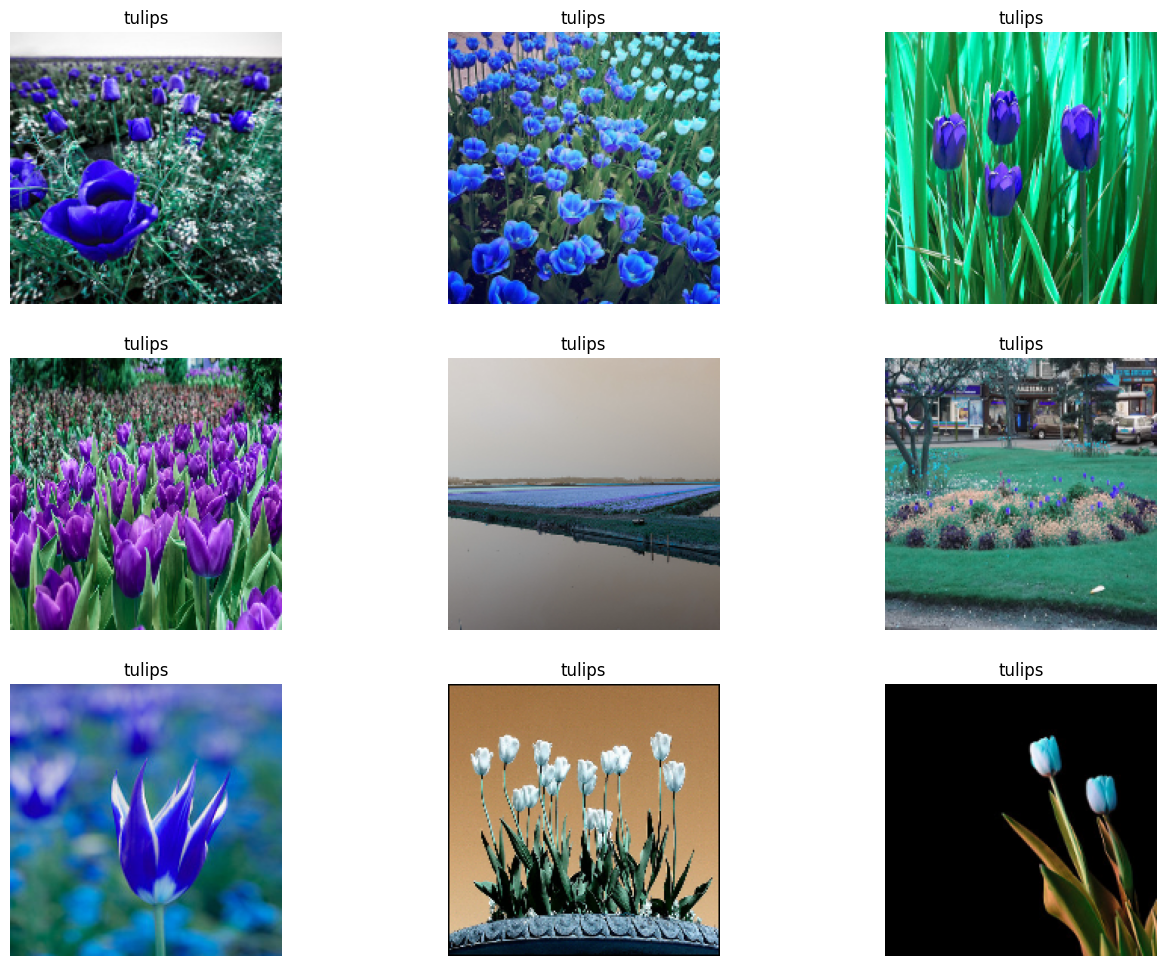

In [86]:
# Repeat same preprocessing but this time using OpenCV. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    ### Read image using OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    ### Resize image 180x180
    img = cv2.resize(img, (180,180))

    ### Get the class name
    class_name = img_path.split('/')[-2]

    ### Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.show()


OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

<Figure size 1000x1000 with 0 Axes>

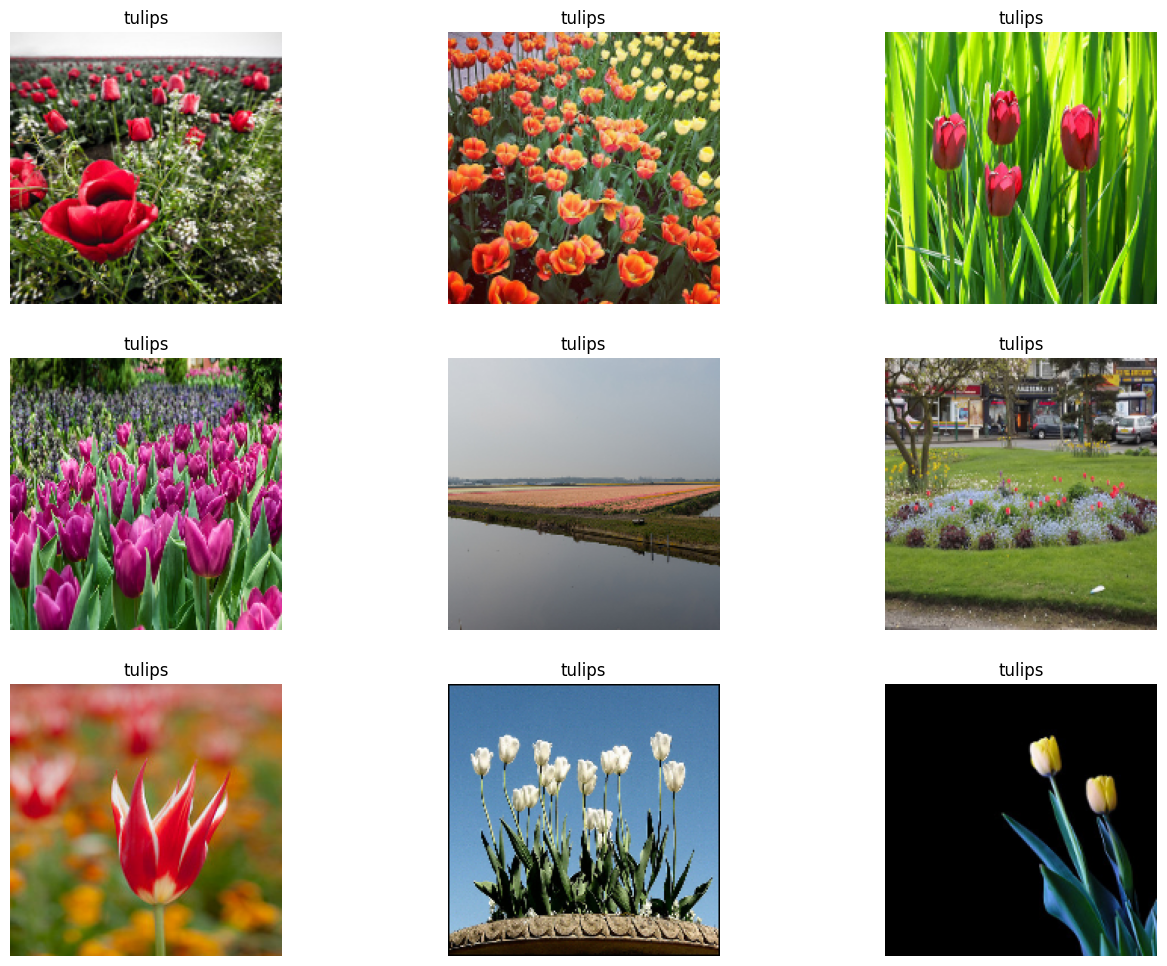

In [87]:
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))
for i in range(9):
    ### Read image using OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    ### Convert BGR to RGB
    ### BGR is opencv default
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ### Resize image 180x180
    img = cv2.resize(img, (180,180))

    ### Get the class name
    class_name = img_path.split('/')[-2]

    ### Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.show()
